In [37]:
from sklearn.datasets import make_blobs
import pandas as pd

X, y = make_blobs(n_samples=500, centers=4, random_state=42, cluster_std=1.0)

df = pd.DataFrame([X[:, 0], X[:, 1], y]).T
df.columns = ['x1', 'x2', 'label']
df["label"] = df["label"].astype(int)
df

,x1,x2,label
0,-7.689054,6.620346,3
1,-9.576514,-6.934404,2
2,6.829682,1.164871,1
3,-2.901306,7.550771,0
4,-5.678413,-7.288185,2
...,...,...,...
495,-7.438972,8.248157,3
496,-2.586299,9.355438,0
497,-7.215412,-5.211088,2
498,-7.402350,-5.831100,2


Text(0.5, 1.0, 'Original Data')

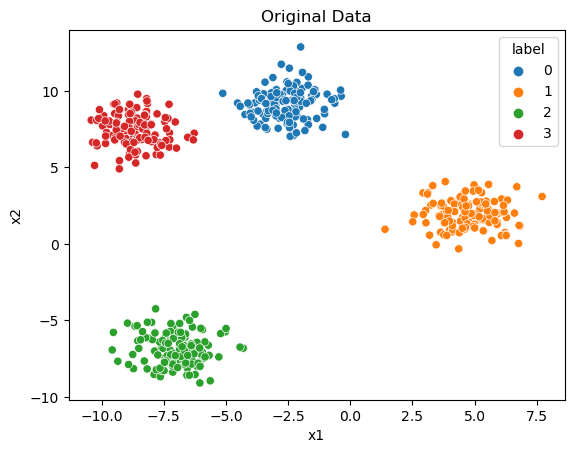

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data = df, x="x1", y="x2", hue="label", palette = "tab10")
plt.title("Original Data")

In [39]:
X = df.drop("label", axis=1)

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X

array([[-8.15393328e-01,  5.89389514e-01],
       [-1.17344434e+00, -1.55328827e+00],
       [ 1.93881064e+00, -2.72988947e-01],
       [ 9.28424972e-02,  7.36467119e-01],
       [-4.33974739e-01, -1.60921239e+00],
       [-5.04330308e-01, -1.68003168e+00],
       [-5.47762469e-01,  6.85359930e-01],
       [-6.10539342e-01, -1.55264699e+00],
       [ 1.32087749e+00, -1.67723315e-01],
       [-7.80373068e-01, -1.54058120e+00],
       [ 1.40075021e+00, -3.16183108e-01],
       [ 3.87010964e-01,  8.38083386e-01],
       [ 1.92804146e+00, -4.53794362e-01],
       [ 2.75523325e-01,  1.14731880e+00],
       [-6.06874712e-01, -1.21663497e+00],
       [ 1.72418817e+00, -4.23230678e-01],
       [ 1.53565087e-01,  1.12644762e+00],
       [-1.24639080e+00,  7.60994391e-01],
       [-1.01780118e+00,  8.68971311e-01],
       [-4.26463166e-02,  7.78722090e-01],
       [ 1.25809683e+00, -5.62247686e-02],
       [ 2.06846826e-01,  6.58037005e-01],
       [ 1.63277791e+00, -9.60154580e-02],
       [-7.

<Axes: >

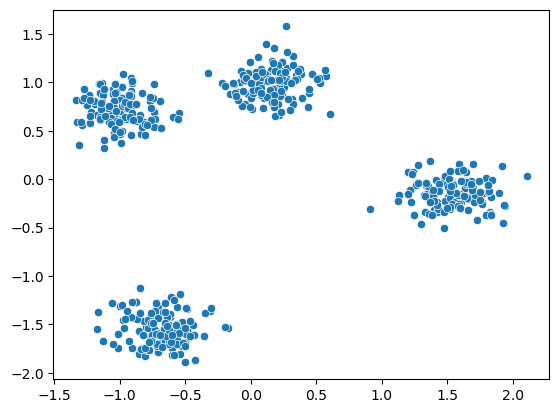

In [41]:
sns.scatterplot(x=scaled_X[:, 0], y=scaled_X[:, 1])

In [42]:
from sklearn.cluster import KMeans

clusters = range(1, 10)
sum_squared_distances = [KMeans(n_clusters=k, n_init="auto").fit(scaled_X).inertia_ for k in clusters]
sum_squared_distances

[999.9999999999999,
 601.2655029229386,
 116.0956785275553,
 28.786938978874026,
 26.209025041394234,
 23.086851420569722,
 20.27686899019272,
 19.11996074868709,
 16.603751843672057]

Text(0.5, 1.0, 'Elbow/knee Method')

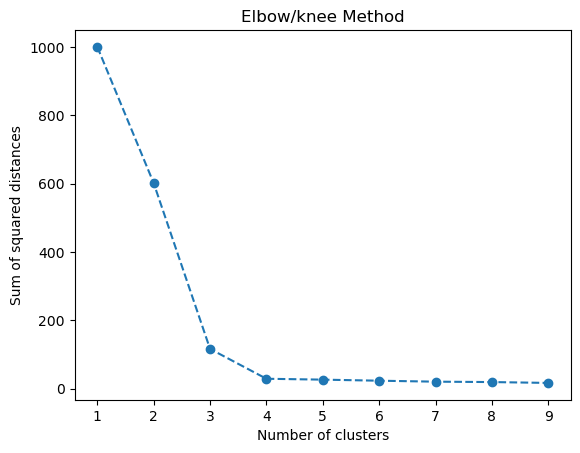

In [43]:
plt.plot(clusters, sum_squared_distances, "--o")
plt.xlabel("Number of clusters")
plt.ylabel("Sum of squared distances")
plt.title("Elbow/knee Method")

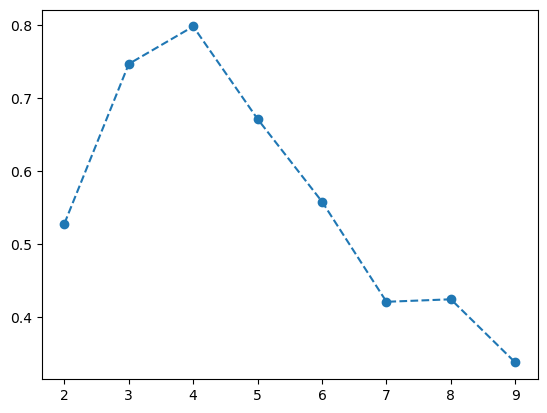

In [44]:
from sklearn.metrics import silhouette_score

kmeans = [KMeans(n_clusters=k, n_init="auto").fit(scaled_X) for k in clusters]
silhouette_scores = [silhouette_score(scaled_X, kmean.labels_) for kmean in kmeans[1:]]

plt.plot(clusters[1:], silhouette_scores, "--o")

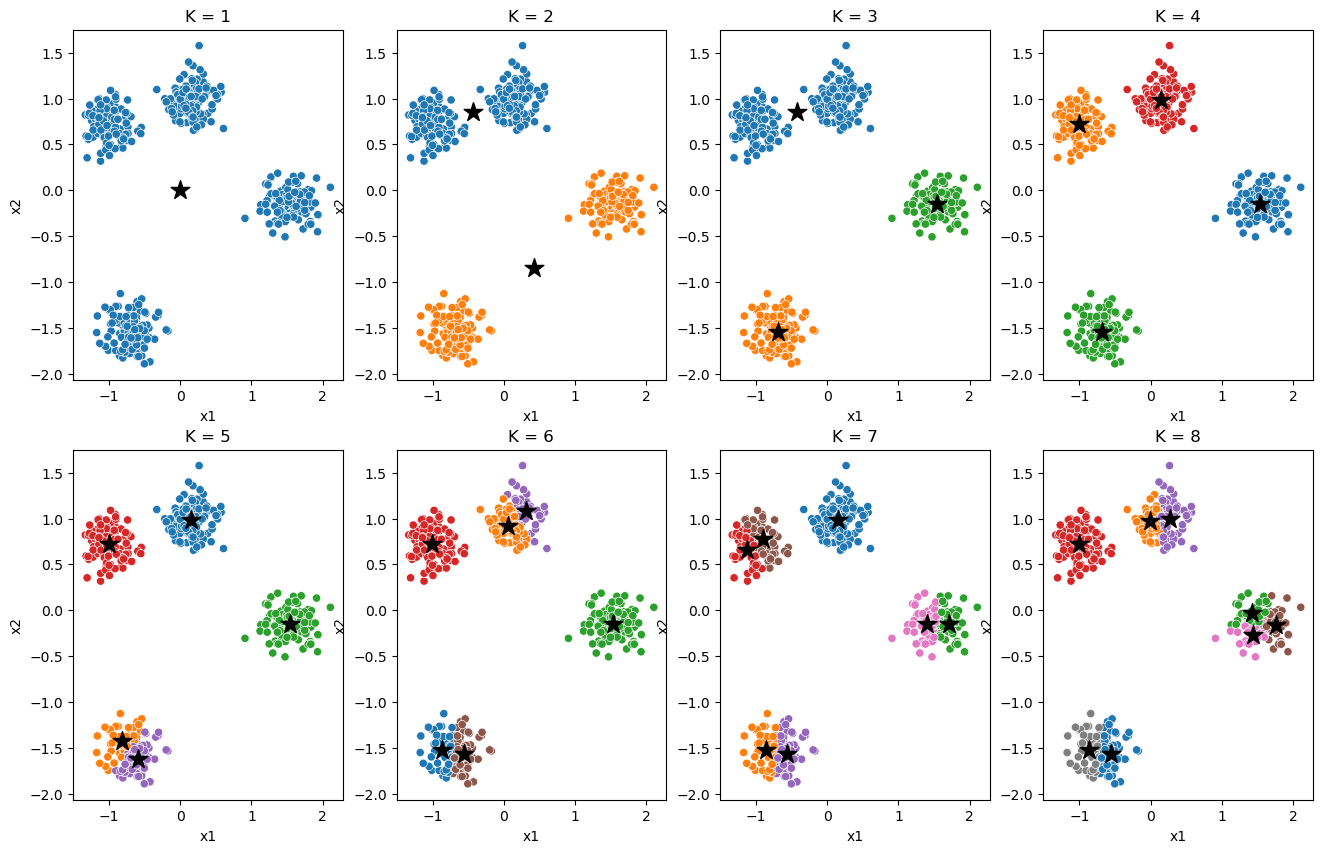

In [45]:
df_plot = pd.DataFrame(scaled_X, columns=["x1", "x2"])

fig, axes = plt.subplots(2, 4, figsize=(16, 10))

for i, ax in enumerate(axes.flatten()):

    cluster_centers = kmeans[i].cluster_centers_
    df_plot["label"] = kmeans[i].labels_

    sns.scatterplot(data=df_plot, x="x1", y="x2", hue="label", palette="tab10", ax=ax)
    ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, marker="*", color="black")

    ax.legend([],[], frameon=False)
    ax.set(title=f"K = {i+1}")

In [51]:
kmeans[3].cluster_centers_ # Coordinates of the cluster centers for 4 clusters

array([[ 1.53895017, -0.15301193],
       [-1.00366735,  0.72139948],
       [-0.68486276, -1.54855438],
       [ 0.14957993,  0.98016683]])